In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [16]:
data=pd.read_csv('lab3.csv')
data.head()

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [17]:
x=data.drop(columns=['y'])
y=data['y']
x.insert(0,'bias',1)
x=np.array(x)
y=np.array(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

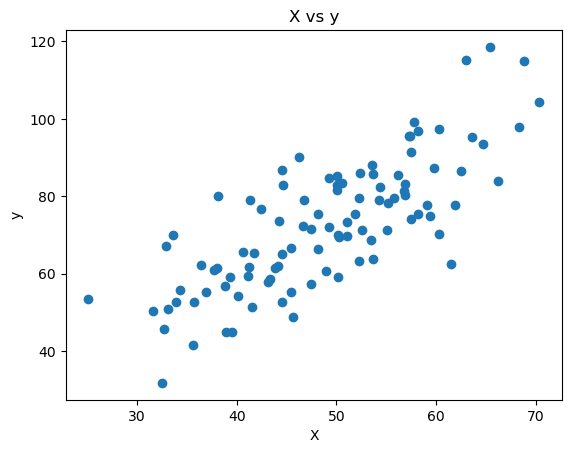

In [18]:
plt.scatter(data['X'],data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('X vs y')
plt.show()

In [19]:
def gradient_descent(w):
    prediction=np.matmul(xtrain,w)
    error=prediction-ytrain
    cost=np.mean(error**2)
    gradient=np.mean((prediction-ytrain)[...,None]*xtrain,axis=0)
    w=w-alpha*gradient
    return w,cost

In [20]:
w=np.array([0,0])
iterations=1000000
alpha=0.0006

In [21]:
cost=[]
for i in range(iterations):
    w,c=gradient_descent(w)
    cost.append(c)
w

array([15.07636054,  1.19463787])

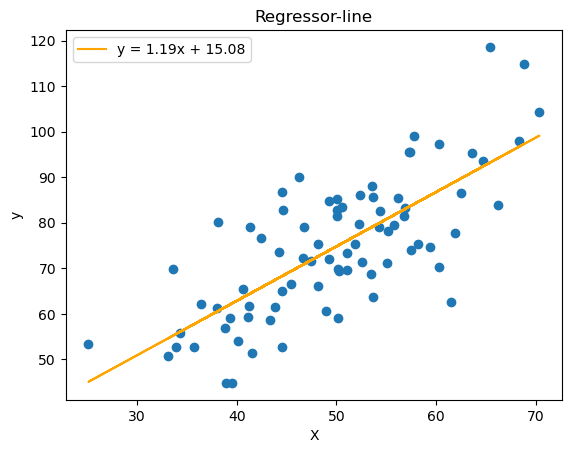

In [22]:
plt.plot(xtrain[:,1],np.matmul(xtrain,w),color='orange',label=f'y = {round(w[1],2)}x + {round(w[0],2)}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressor-line')
plt.scatter(xtrain[:,1],ytrain)
plt.legend()
plt.show()

In [23]:
cost=np.array(cost)
index = np.arange(len(cost))

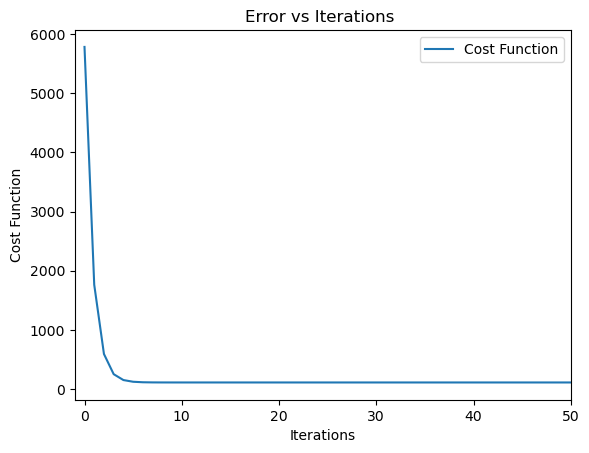

In [24]:
plt.plot(index,cost,label='Cost Function')
plt.xlim(-1, 50)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Error vs Iterations ')
plt.legend()
plt.show()

In [25]:
predictions=np.matmul(xtest,w)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(ytest, predictions))
print("RMSE:", rmse)
r2 = r2_score(ytest, predictions)
print("R2_score:", r2)

RMSE: 12.377773290117348
R2_score: 0.6154965856631491
